In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def split (dataset, training_ratio):
    n = len (dataset) # Size of dataset
    r = int (training_ratio * n) # No. of training examples
    np.random.shuffle (dataset) # Shuffling the dataset
    return dataset[:r,:], dataset[r:,:]

In [3]:
def train (train_data):
    n = len (train_data) # Size of training dataset
    # Split the data and flatten the numpy arrays
    x, y = np.ravel (train_data[:,:1]), np.ravel (train_data[:,1:])
    # Plot the training dataset
    plt.scatter (x, y, color = "blue", s = 1, label = 'Train data')
    # Calculate mean, variance and covariance
    mean_x = np.sum(x) / n
    mean_y = np.sum(y) / n
    covariance_x_y = (1/n) * np.sum(x*y) - mean_x * mean_y 
    var_x = (1/n) * np.sum(x*x) - mean_x * mean_x 
    # y(bar) = a * x(bar) + b
    a = covariance_x_y / var_x
    b = mean_y - a * mean_x
    return a, b

In [4]:
def test (test_data, coefficients):
    n = len (test_data) # Size of testing dataset
    a, b = coefficients[0], coefficients[1]
    # Split the data and flatten the numpy arrays
    x, y = np.ravel (test_data[:,:1]), np.ravel (test_data[:,1:])
    # Plot the testing dataset
    plt.scatter (x, y, color = "red", s = 1, label = 'Test data')
    # Display the test results
    p = 10; # No. of decimal places
    print ("X\t\tY\t\tY(Predicted)");
    print ("______________________________________________");
    for i in range (n):
        y_pred = a * x[i] + b
        print (str(round(x[i],p)) + "\t" + str(round(y[i],p)) + "\t" + str(round(y_pred,p)))
    print ("______________________________________________");
    

In [5]:
def plot_regression_line (dataset, coefficients):
    a, b = coefficients[0], coefficients[1]
    # Split the data and flatten the numpy arrays
    x, y = np.ravel (dataset[:,:1]), np.ravel (dataset[:,1:])
    y_pred = a * x + b
    # Plot the regression line
    plt.plot (x, y_pred, color = "green")
    plt.xlabel ('X')
    plt.ylabel ('Y')
    plt.legend (loc = 'lower right')
    plt.title ("Linear Regression Model")
    plt.savefig ('output_plot.png', dpi=400)

In [6]:
def main ():
    # Read the csv file
    dataset = pd.read_csv ('Linear_Regression_Data_1D.csv').to_numpy()
    # Split the data set
    train_data, test_data = split (dataset, 0.8)
    # Train the data
    coefficients = train (train_data)
    # Test the data
    test (test_data, coefficients)
    # Plot the data
    plot_regression_line (dataset, coefficients)

X		Y		Y(Predicted)
______________________________________________
4.542750949	10.78134696	11.2513746937
4.212960539	11.72073369	10.7567502519
4.454896478	11.56228129	11.1196092834
3.24576689	8.85717517	9.3061391843
4.398007901	11.0628879	11.0342869703
3.261902306	9.524611137	9.3303393154
4.115108228	9.903792378	10.6099899362
4.953583715	11.14482404	11.8675476368
3.556443866	10.09667452	9.7720970205
0.174646852	4.910807819	4.7000287931
3.396788345	8.81398755	9.5326433537
3.645495192	9.731881487	9.9056574912
0.90143544	6.332715308	5.7900768622
2.740977908	9.244283787	8.5490493453
4.784062044	12.36874232	11.6132965751
0.949496481	5.364328739	5.8621595088
1.737519743	7.802061052	7.0440482304
3.312284908	9.257915027	9.4059038728
1.261653412	6.204622691	6.3303370029
4.801051301	10.78777518	11.6387773092
4.182390568	10.67921449	10.7109009659
2.587238494	9.308393261	8.3184687416
4.83208015	11.39441439	11.6853148272
1.48720253	6.166632876	6.6686188426
2.099414369	7.874117333	7.5868230412
1.3677

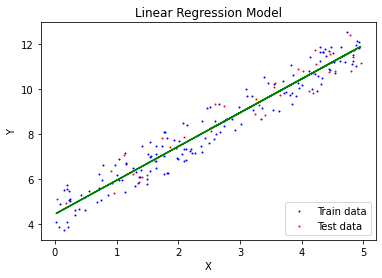

In [7]:
main()